# Assignment 1

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

## Haberman Cancer Survival Dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#to hide warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading Haberman Cancer Survival dataset to haberman
haberman = pd.read_csv('haberman.csv')

In [4]:
# finding the number of observations and number of features
shape = haberman.shape
print(f'Number of observations are: {shape[0]}')
print(f'Number of features are: {shape[1]}')

# finding the column names in the dataset
columns = haberman.columns
print(f'\nColumns present: {columns}')

Number of observations are: 306
Number of features are: 4

Columns present: Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
# number of classes in the dataset
classes = haberman['status'].nunique()
print(f'Number of classes are: {classes}')

# observations corresponding to per class
haberman['status'].value_counts()

Number of classes are: 2


1    225
2     81
Name: status, dtype: int64

1. There are 306 data points.
2. There are 3 features which are:
<br>*Age of patient at time of operation*
<br>*Patient's year of operation*
<br>*Number of positive axillary nodes detected*: https://en.wikipedia.org/wiki/Axillary_lymph_nodes
3. 4th column consists of class, class 1 means that patient survive for 5 years or more, and<br> class 2 means that patient died within 5 year.

In [6]:
g = pd.DataFrame(haberman.groupby("nodes")["year"].apply(np.mean)).reset_index()
g

,nodes,year
0,0,63.102941
1,1,62.560976
2,2,60.900000
3,3,63.100000
4,4,62.846154
5,5,62.833333
6,6,62.428571
7,7,65.428571
8,8,63.428571
9,9,62.333333


## Objective
1. Analyze the Haberman Cancer survival dataset and find out the most useful features.

# 1. Univariate analysis

## 1.1 Histograms,  PDFs and CDFs

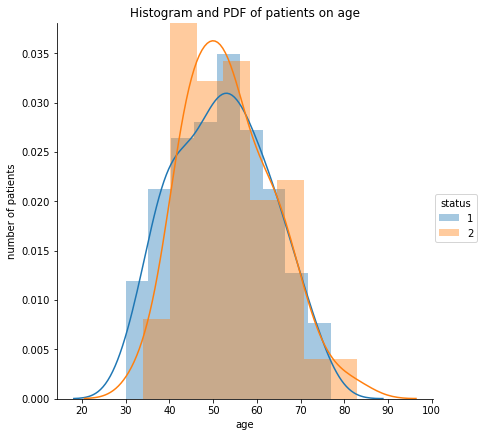

In [7]:
#Histogram and PDF on the basis of age of patient
sns.FacetGrid(haberman, hue = 'status', size = 6).map(sns.distplot, 'age').set_ylabels('number of patients').add_legend()
plt.title('Histogram and PDF of patients on age')
plt.show()

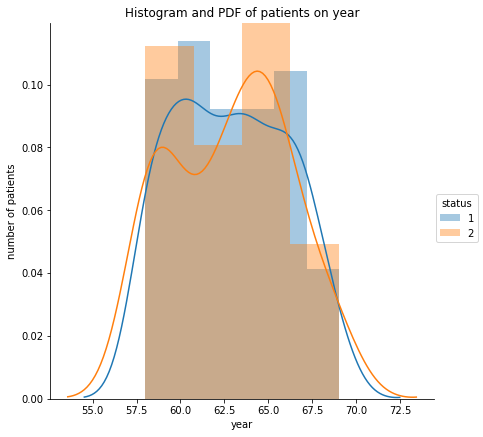

In [8]:
#Histogram and PDF on the basis of year of operation
sns.FacetGrid(haberman, hue = 'status', size = 6).map(sns.distplot, 'year').set_ylabels('number of patients').add_legend()
plt.title('Histogram and PDF of patients on year')
plt.show()

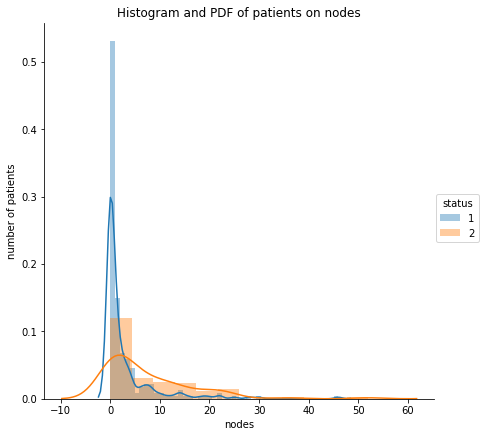

In [9]:
#Histogram and PDF on the basis of auxiliary nodes
sns.FacetGrid(haberman, hue = 'status', size = 6).map(sns.distplot, 'nodes').set_ylabels('number of patients').add_legend()
plt.title('Histogram and PDF of patients on nodes')
plt.show()

By looking at Histograms and PDF(using KDE), we can say that:
<br>1. Histograms and PDF of age and year are overlapped to each other to high extent and hence doesn't provides much information.
<br>2. Auxiliary nodes provides more information than the remaining features. It tells that most of the people who survived have auxiliary nodes between 0 to 3, but after that only some of them are managed to survive. People who are not survived have have peak at between 0 to 7 but there numbers are very less than survived. There are also non survivals who have nodes between 10 and 20.

[0.73333333 0.10222222 0.02666667 0.05333333 0.01333333 0.00888889
 0.02222222 0.00444444 0.00888889 0.00888889 0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.00444444]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


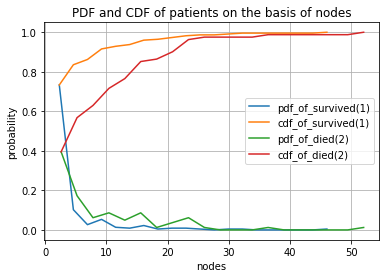

In [10]:
#haberman_1 contains data of survivals
haberman_1 = haberman[haberman.status == 1]
#haberman_1 contains data of non-survivals
haberman_2 = haberman[haberman.status == 2]

#PDF and CDF of survived on the basis of nodes
counts, bin_edges = np.histogram(haberman_1['nodes'], bins = 20, density = True)
pdf1 = counts / sum(counts)
print(pdf1)
print(bin_edges)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges[1:], pdf1)
plt.plot(bin_edges[1:], cdf1)

#PDF and CDF of non-survived on the basis of nodes
counts, bin_edges = np.histogram(haberman_2['nodes'], bins = 20, density = True)
pdf2 = counts / sum(counts)
print(pdf2)
print(bin_edges)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges[1:], pdf2)
plt.plot(bin_edges[1:], cdf2)

#plotting the graph
plt.legend(('pdf_of_survived(1)', 'cdf_of_survived(1)', 'pdf_of_died(2)', 'cdf_of_died(2)'))
plt.title('PDF and CDF of patients on the basis of nodes')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.grid(True)
plt.show()

## 1.2 Mean and Median

In [11]:
#Mean of survived and non-survived on nodes
print('Means: ')
print('Mean of nodes of class 1: ', np.mean(haberman_1['nodes']))
print('Mean of nodes of class 2: ', np.mean(haberman_2['nodes']))

#std deviation of survived and non-survived on nodes
print('\nStd deviation: ')
print('Std deviation of nodes of class 1: ', np.std(haberman_1['nodes']))
print('Std deviation of nodes of class 2: ', np.std(haberman_2['nodes']))

Means: 
Mean of nodes of class 1:  2.7911111111111113
Mean of nodes of class 2:  7.45679012345679

Std deviation: 
Std deviation of nodes of class 1:  5.857258449412131
Std deviation of nodes of class 2:  9.128776076761632


In [12]:
#Median on nodes
print('Medians: ')
print('Class 1: ', np.median(haberman_1['nodes']))
print('Class 2: ', np.median(haberman_2['nodes']))

#Quantiles on nodes
print('\nQuantiles: ')
print('Class 1: ', np.percentile(haberman_1['nodes'], np.arange(25, 101, 25)))
print('Class 2: ', np.percentile(haberman_2['nodes'], np.arange(25, 101, 25)))

#90 percentile on nodes
print('\n90 percentile')
print('Class 1: ', np.percentile(haberman_1['nodes'], 90))
print('Class 2: ', np.percentile(haberman_2['nodes'], 90))

#99 percentile on nodes
print('\n99 percentile')
print('Class 1: ', np.percentile(haberman_1['nodes'], 99))
print('Class 2: ', np.percentile(haberman_2['nodes'], 99))

Medians: 
Class 1:  0.0
Class 2:  4.0

Quantiles: 
Class 1:  [ 0.  0.  3. 46.]
Class 2:  [ 1.  4. 11. 52.]

90 percentile
Class 1:  8.0
Class 2:  20.0

99 percentile
Class 1:  27.279999999999973
Class 2:  38.40000000000005


In [13]:
#Median on age
print('Medians: ')
print('Class 1: ', np.median(haberman_1['age']))
print('Class 2: ', np.median(haberman_2['age']))

#Quantiles on age
print('\nQuantiles: ')
print('Class 1: ', np.percentile(haberman_1['age'], np.arange(25, 101, 25)))
print('Class 2: ', np.percentile(haberman_2['age'], np.arange(25, 101, 25)))

#90 percentile on age
print('\n90 percentile')
print('Class 1: ', np.percentile(haberman_1['age'], 90))
print('Class 2: ', np.percentile(haberman_2['age'], 90))

#99 percentile on age
print('\n99 percentile')
print('Class 1: ', np.percentile(haberman_1['age'], 99))
print('Class 2: ', np.percentile(haberman_2['age'], 99))

Medians: 
Class 1:  52.0
Class 2:  53.0

Quantiles: 
Class 1:  [43. 52. 60. 77.]
Class 2:  [46. 53. 61. 83.]

90 percentile
Class 1:  67.0
Class 2:  67.0

99 percentile
Class 1:  74.75999999999999
Class 2:  79.00000000000001


In [14]:
#Median on year
print('Medians: ')
print('Class 1: ', np.median(haberman_1['year']))
print('Class 2: ', np.median(haberman_2['year']))

#Quantiles on year
print('\nQuantiles: ')
print('Class 1: ', np.percentile(haberman_1['year'], np.arange(25, 101, 25)))
print('Class 2: ', np.percentile(haberman_2['year'], np.arange(25, 101, 25)))

#90 percentile on year
print('\n90 percentile')
print('Class 1: ', np.percentile(haberman_1['year'], 90))
print('Class 2: ', np.percentile(haberman_2['year'], 90))

#99 percentile on year
print('\n99 percentile')
print('Class 1: ', np.percentile(haberman_1['year'], 99))
print('Class 2: ', np.percentile(haberman_2['year'], 99))

Medians: 
Class 1:  63.0
Class 2:  63.0

Quantiles: 
Class 1:  [60. 63. 66. 69.]
Class 2:  [59. 63. 65. 69.]

90 percentile
Class 1:  67.0
Class 2:  67.0

99 percentile
Class 1:  69.0
Class 2:  69.0


1. 50% of population who survived have 0 nodes.<br>
2. Even 90% of survivals have less than or equal to 8 nodes.<br>
3. Quantiles on the basis of age and year have approx same results.

## 1.3 Box and Violin plots

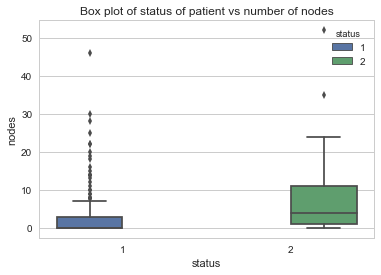

In [15]:
#Box plots on nodes
sns.set(style = 'whitegrid')
sns.boxplot(x = 'status', y = 'nodes', hue = 'status', data = haberman)
plt.title('Box plot of status of patient vs number of nodes')
plt.show()

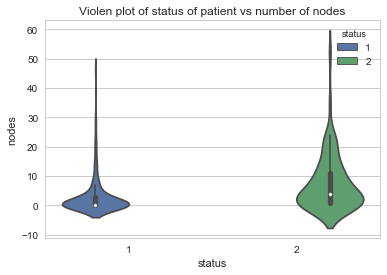

In [16]:
#Violin plots on nodes
sns.violinplot(x = 'status', y = 'nodes', hue = 'status', data = haberman)
plt.title('Violen plot of status of patient vs number of nodes')
plt.show()

### Observations
1. For survived population(class 1):<br>
    a. 50% of population have 0 nodes.<br>
    b. 90% of population have less than or equal to 8 nodes.<br>
    c. After 8 nodes survived population is very sparsely distributed.<br>
2. For non-survived population(class 2):<br>
    a. 50% of non-survived population have less than or equal to 3 nodes.<br>
    b. 90% of survived have less than or equal to 20 nodes.
    c. After 22 nodes survived population is very sparsely distributed.<br>
3. Age and year doesn't tells any useful information.<br>
4. On the basis of Univariate analysis, we can say that nodes convey most important information, then age and then year(both doesn't tells much useful info).

# 2. Bivariate analysis

## 2.1 Scatter and pair plots

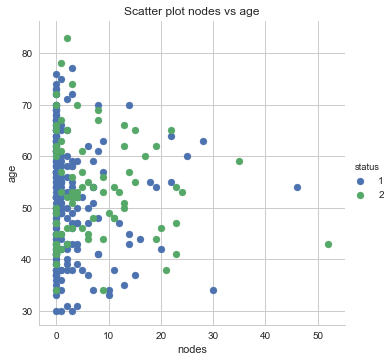

In [17]:
# Scatter plot between nodes and age
sns.FacetGrid(haberman, hue = 'status', size = 5).map(plt.scatter, 'nodes', 'age').add_legend()
plt.title('Scatter plot nodes vs age')
plt.show()

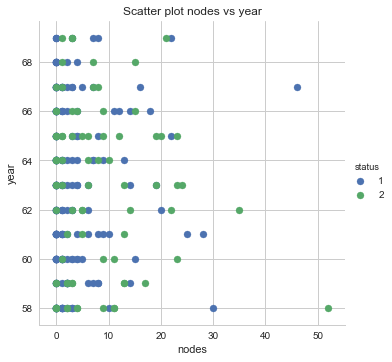

In [18]:
#Scatter plot between nodes and year
sns.FacetGrid(haberman, hue = 'status', size = 5).map(plt.scatter, 'nodes', 'year').add_legend()
plt.title('Scatter plot nodes vs year')
plt.show()

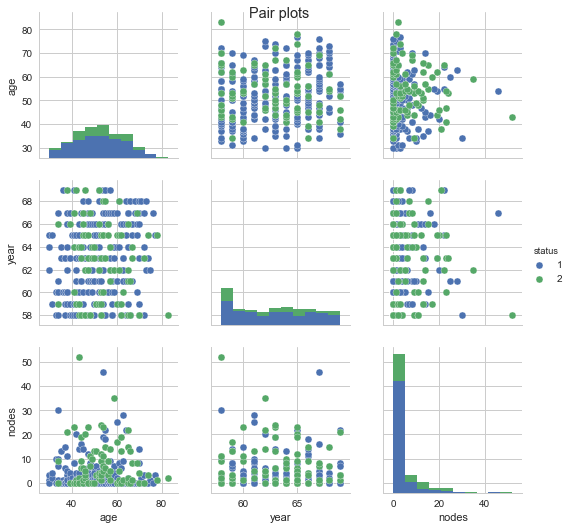

In [19]:
#Pair plot 
#Add title to pair plot, https://stackoverflow.com/a/49594152
sns.set_style('whitegrid')
sns.pairplot(haberman, hue = "status", vars = ['age', 'year', 'nodes']).fig.suptitle("Pair plots")
# plt.title('Pair plots')
plt.show()

### Observations
1. Between 0 to 4 node there are more number of survivors than non-survivors. After that both are randomly distributed.<br>
2. Between 0 to 4 population of non-survivas are also more than the rest of the plot.<br>
3. Plot between (age, year) and (nodes, year) doesn't convey useful information.<br>
4. Nodes and age can be used as combination of features.

Therefore, after analyzing the dataset, the order of useful features are nodes then age then year. Nodes is most useful but remaining doesn't provides much information. Nodes and age can be used as combination of feature.